In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [7]:
df.groupby('Pclass')['Age'].transform('mean')

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
         ...    
886    29.877630
887    38.233441
888    25.140620
889    38.233441
890    25.140620
Name: Age, Length: 891, dtype: float64

In [8]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [9]:
df.shape

(891, 6)

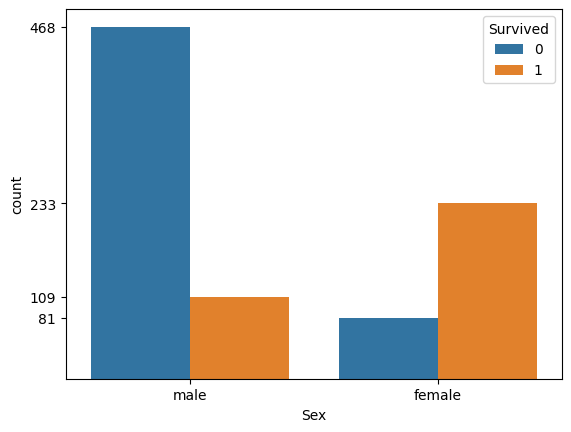

In [10]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.yticks(df.groupby(['Sex', 'Survived'])['Survived'].count())
plt.show()

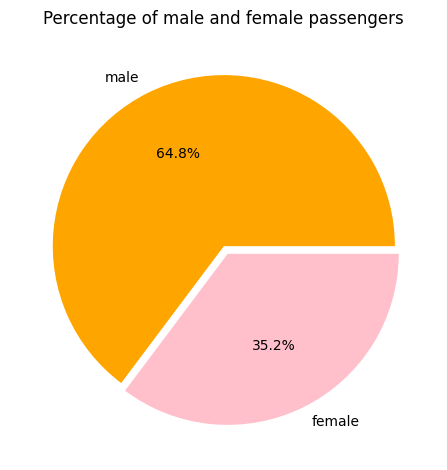

In [11]:
plt.pie(x=df['Sex'].value_counts(), labels=['male', 'female'], autopct="%1.1f%%", colors=['orange', 'pink'], explode=[0, 0.05])
plt.title('Percentage of male and female passengers')
plt.tight_layout()
plt.show()

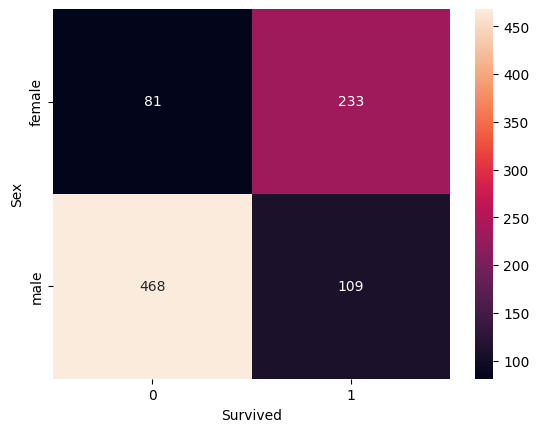

In [12]:
sns.heatmap(df.groupby(['Sex', 'Survived']).size().unstack(), annot=True, fmt='d')
plt.show()

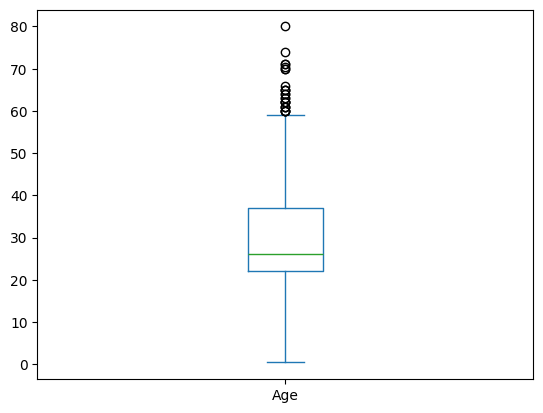

In [13]:
df['Age'].plot(kind='box')
plt.show()

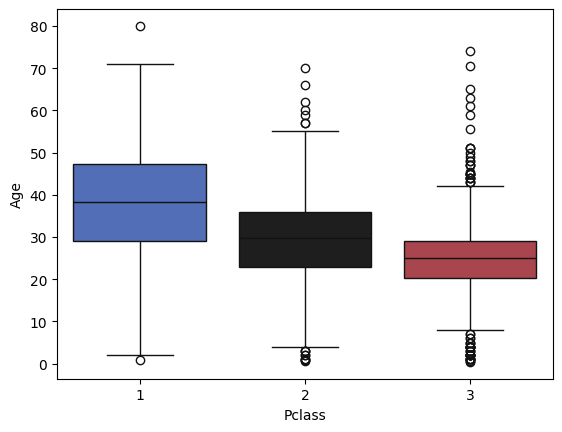

In [14]:
sns.boxplot(data=df, x='Pclass', y='Age', palette='icefire')
plt.show()

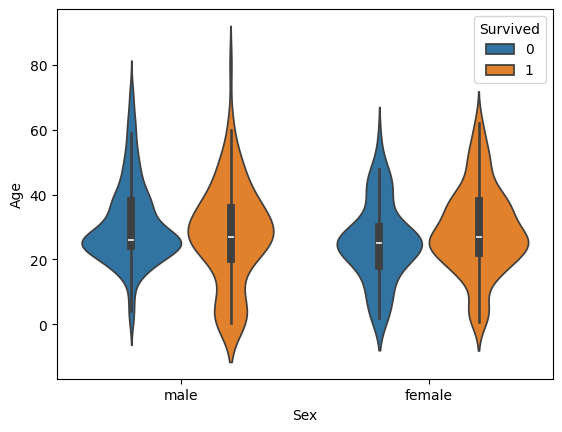

In [15]:
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived')
plt.show()

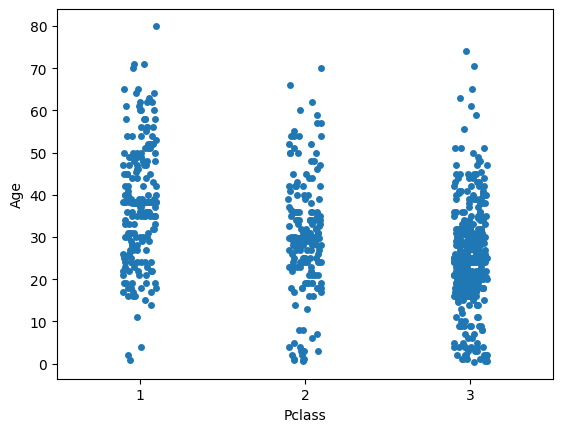

In [16]:
sns.stripplot(data=df, x='Pclass', y='Age', jitter=True,dodge=True)
plt.show()

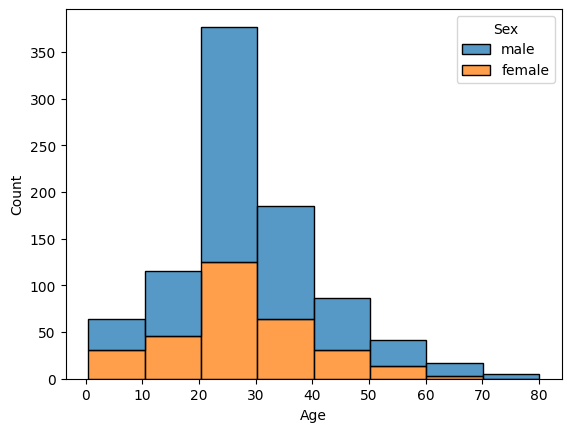

In [17]:
sns.histplot(data=df, x='Age', hue='Sex', bins=8, multiple='stack')
plt.show()

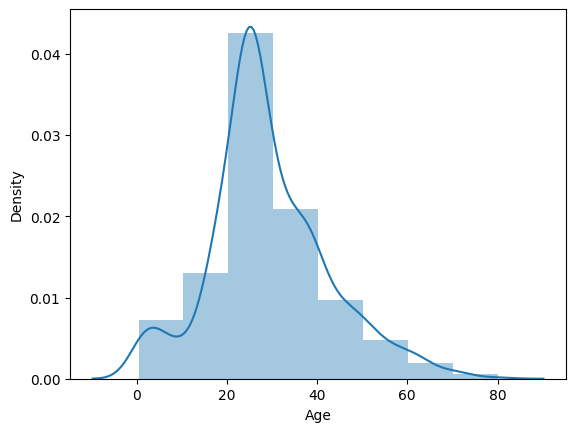

In [18]:
sns.distplot(df['Age'], bins=8) 
plt.show()          

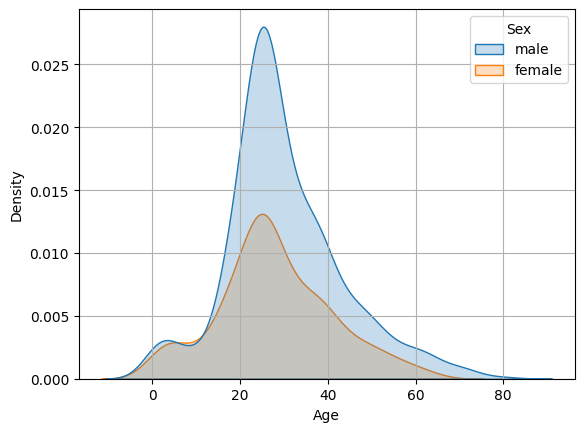

In [19]:
sns.kdeplot(data = df, x='Age', hue='Sex', fill=True)
plt.grid()
plt.show()

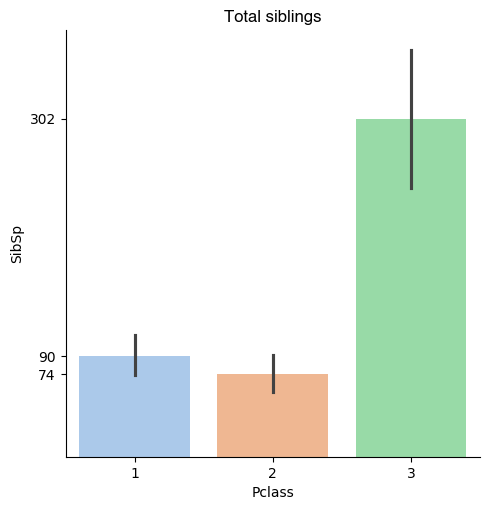

In [20]:
sns.catplot(data=df, x='Pclass', y='SibSp', kind='bar', estimator=np.sum, palette='pastel')
plt.yticks(df.groupby('Pclass')['SibSp'].sum())
plt.title('Total siblings', fontname='Helvetica')
plt.show()